In [1]:
from PIL import Image
import os, glob, numpy as np
from sklearn.model_selection import train_test_split
import cv2

caltech_dir = "D:\\Drebin\\dex_exper\\dex_dataset_20"

categories =[]

with open("D:\\Drebin\\\\fam_20.txt","r") as f:
    lines = f.readlines()
    for line in lines:
        categories.append(line.split('\n')[0])
    
nb_classes = len(categories)
print(categories)

image_w = 64
image_h = 64

pixels = image_h * image_w

X = []
y = []

for idx, cat in enumerate(categories):
    
    #one-hot 돌리기.
    label = [0 for i in range(nb_classes)]
    label[idx] = 1

    image_dir = caltech_dir + "\\" + cat + "\\"
    files = glob.glob(image_dir+"*.jpg")
        
    for i, f in enumerate(files):
        img = Image.open(f)
        img = img.convert("L")
        img = img.resize((image_w, image_h))
        data = np.asarray(img)

        X.append(data)
        y.append(label)



['Adrd', 'BaseBridge', 'DroidDream', 'DroidKungFu', 'ExploitLinuxLotoor', 'FakeDoc', 'FakeInstaller', 'FakeRun', 'Gappusin', 'Geinimi', 'GinMaster', 'Glodream', 'Iconosys', 'Imlog', 'Kmin', 'MobileTx', 'Opfake', 'Plankton', 'SendPay', 'SMSreg']


In [12]:
X = np.array(X)
y = np.array(y)


X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y,test_size=0.2,random_state = 42)
xy = (X_train, X_test, y_train, y_test)
np.save("D:\\Drebin\\dex_exper\\multi_code_data.npy20", xy)

print("ok", len(y))

ok 4639


In [13]:
print(xy)

# y_train = np_utils.to_categorical(y_train)
# y_test = np_utils.to_categorical(y_test)

(array([[[105,  66,  13, ...,  67,   2,   2],
        [ 98,  82,   2, ...,  83,   4,   3],
        [149,  86,   3, ...,  89,   2,   4],
        ...,
        [ 43,  41,  89, ...,  14,  78,  77],
        [ 29,  74,  77, ...,  27,  45,  45],
        [ 47,  55,  37, ...,  82,  34,  14]],

       [[116,  44,  27, ...,  39,   2,   4],
        [116,  51,   3, ...,  52,   4,   5],
        [ 99,  52,   2, ...,  53,   2,   4],
        ...,
        [ 21,  67,  29, ...,  74,  42,  62],
        [ 47,  77,  32, ...,  55,  17,  52],
        [ 42,  13,   8, ...,  11,   2,   2]],

       [[ 81,  68,  63, ...,  75,  74,  71],
        [ 64,  59,  61, ...,  57,  57,  57],
        [ 37,  37,  37, ...,  37,  37,  35],
        ...,
        [ 56,  55,  53, ...,  53,  60,  61],
        [ 78,  73,  66, ...,  71,  76,  78],
        [ 76,  83,  87, ...,  71,  75,  82]],

       ...,

       [[ 68,  74,  76, ...,  68,  69,  68],
        [ 67,  66,  66, ...,  68,  68,  65],
        [ 53,  49,  46, ...,  42,  46,  4

In [14]:
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [15]:
X_train = X_train.reshape(X_train.shape[0], 64, 64, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 64, 64, 1).astype('float32') / 255

print(X_train.shape)
print(X_train.shape[0])
print(y_train.shape)

(3711, 64, 64, 1)
3711
(3711, 20)


In [16]:
print(X_test)

[[[[0.52156866]
   [0.10588235]
   [0.4       ]
   ...
   [0.09411765]
   [0.42745098]
   [0.05098039]]

  [[0.49019608]
   [0.09803922]
   [0.49803922]
   ...
   [0.09019608]
   [0.43137255]
   [0.05098039]]

  [[0.5058824 ]
   [0.10196079]
   [0.49019608]
   ...
   [0.09411765]
   [0.43529412]
   [0.05882353]]

  ...

  [[0.15294118]
   [0.26666668]
   [0.13725491]
   ...
   [0.1882353 ]
   [0.26666668]
   [0.23529412]]

  [[0.10196079]
   [0.1882353 ]
   [0.2509804 ]
   ...
   [0.27058825]
   [0.14901961]
   [0.13725491]]

  [[0.16470589]
   [0.28235295]
   [0.19215687]
   ...
   [0.27450982]
   [0.17254902]
   [0.26666668]]]


 [[[0.27058825]
   [0.27450982]
   [0.27058825]
   ...
   [0.24313726]
   [0.24705882]
   [0.23529412]]

  [[0.27058825]
   [0.2784314 ]
   [0.27058825]
   ...
   [0.26666668]
   [0.2509804 ]
   [0.24313726]]

  [[0.20784314]
   [0.1882353 ]
   [0.20392157]
   ...
   [0.1882353 ]
   [0.19215687]
   [0.19215687]]

  ...

  [[0.22352941]
   [0.25882354]
   [0.2

In [17]:
import os, glob, numpy as np
from keras.models import Sequential
from keras.layers import Conv2D,Conv3D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import keras.backend.tensorflow_backend as K
from keras.optimizers import SGD, RMSprop

import tensorflow as tf
from keras import optimizers
from keras.utils import np_utils
from keras.applications.inception_v3 import InceptionV3
import sys


In [8]:
with K.tf_ops.device('/device:GPU:0'):
    model = Sequential()
    model.add(Conv2D(64, kernel_size=(3,3), input_shape = (64,64,1), activation='relu'))
    model.add(Conv2D(128, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(256, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.5))
    model.add(Conv2D(512, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(20, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='Adamax', metrics=['accuracy'])
    
    model_dir = './model/'
    if not os.path.exists(model_dir):
        os.mkdir(model_dir)
    
    modelName = model_dir + 'cnn_mnist.model'
    
    checkpointer = ModelCheckpoint(filepath=modelName, monitor='val_loss', verbose=1, save_best_only = True)
    
    early_stopping = EarlyStopping(monitor='val_loss', patience=7)

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 256)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 256)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 512)      

In [10]:
import time
history = model.fit(X_train, y_train, epochs=100, batch_size=20,validation_split= 0.15, callbacks=[early_stopping, checkpointer])


Train on 3154 samples, validate on 557 samples
Epoch 1/100
3154/3154 [==============================] - 5s 2ms/step - loss: 2.2688 - accuracy: 0.3079 - val_loss: 1.9287 - val_accuracy: 0.4434

Epoch 00001: val_loss improved from inf to 1.92870, saving model to ./model/cnn_mnist.model
Epoch 2/100
3154/3154 [==============================] - 3s 832us/step - loss: 1.6464 - accuracy: 0.5342 - val_loss: 1.4373 - val_accuracy: 0.6122

Epoch 00002: val_loss improved from 1.92870 to 1.43731, saving model to ./model/cnn_mnist.model
Epoch 3/100
3154/3154 [==============================] - 3s 829us/step - loss: 1.2490 - accuracy: 0.6573 - val_loss: 1.1600 - val_accuracy: 0.6876

Epoch 00003: val_loss improved from 1.43731 to 1.16003, saving model to ./model/cnn_mnist.model
Epoch 4/100
3154/3154 [==============================] - 3s 826us/step - loss: 1.0378 - accuracy: 0.7140 - val_loss: 0.9698 - val_accuracy: 0.7163

Epoch 00004: val_loss improved from 1.16003 to 0.96979, saving model to ./model

In [11]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix

y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

print(classification_report(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.92      0.61      0.73        18
           1       0.93      0.83      0.88        65
           2       0.87      0.81      0.84        16
           3       0.88      0.91      0.89       133
           4       0.75      0.46      0.57        13
           5       0.79      0.88      0.84        26
           6       0.97      0.99      0.98       185
           7       1.00      0.92      0.96        12
           8       1.00      0.67      0.80        12
           9       0.57      0.67      0.62        18
          10       0.65      0.69      0.67        68
          11       0.75      0.43      0.55        14
          12       0.88      0.97      0.92        31
          13       0.90      1.00      0.95         9
          14       0.94      1.00      0.97        29
          15       0.93      1.00      0.97        14
          16       0.97      0.97      0.97       120
          17       0.92    

In [56]:
from sklearn.metrics import precision_recall_curve

In [22]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(20):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_pred[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_pred[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(),
    y_pred.ravel())
average_precision["micro"] = average_precision_score(y_test, y_pred,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 0.96


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.96')

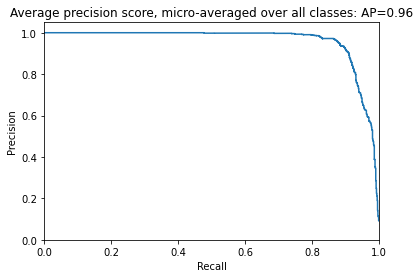

In [46]:
plt.figure()
plt.step(recall['micro'], precision['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))

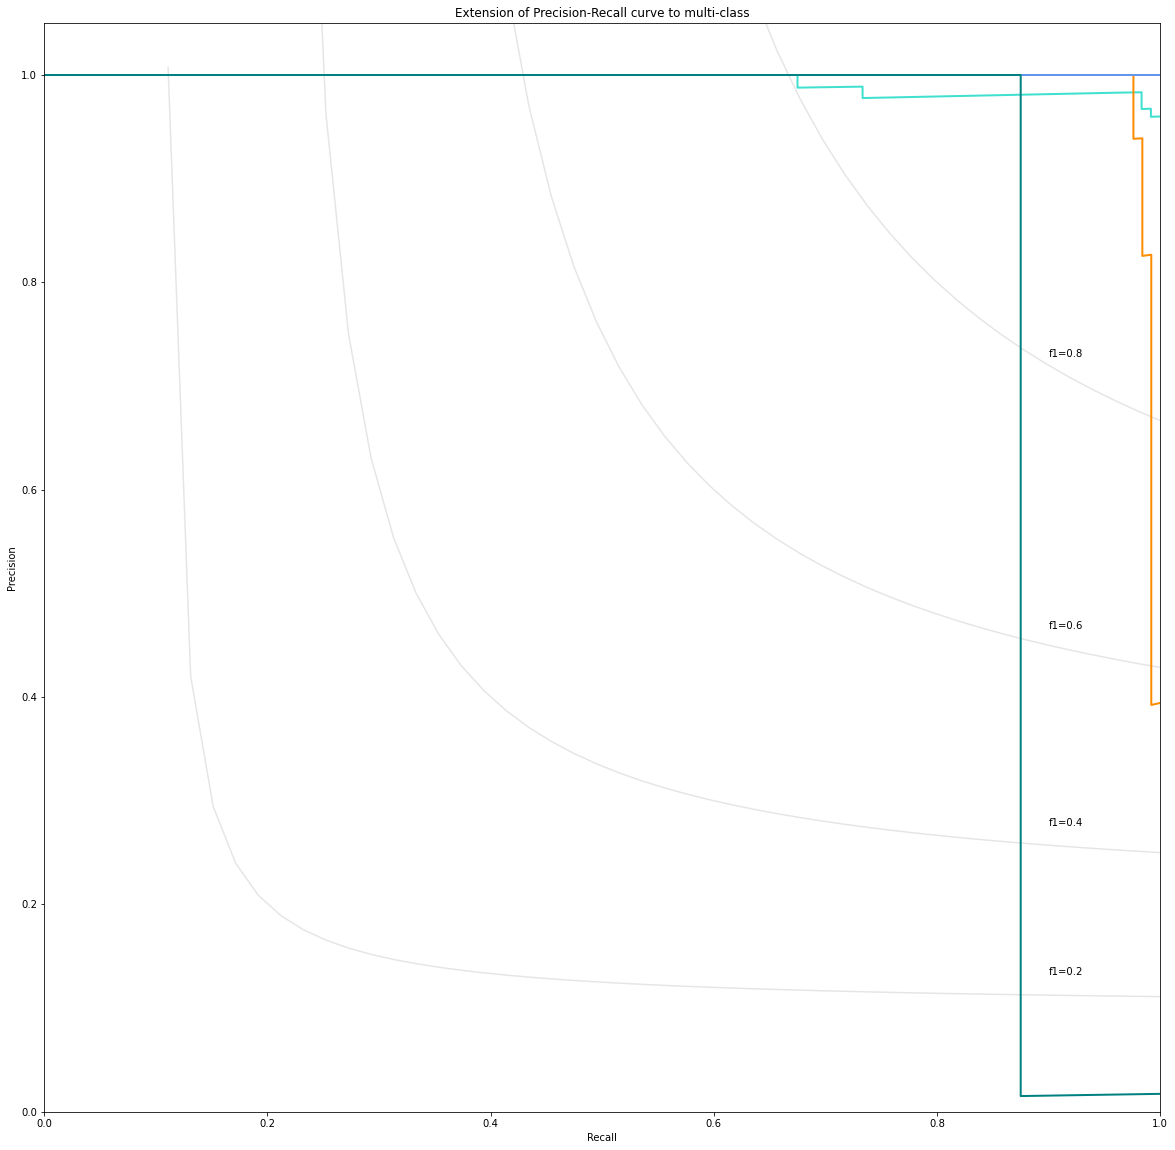

In [64]:
from itertools import cycle
import matplotlib.colors as mcolors
import random
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
random_colors=random.sample(list(colors),20)
# setup plot details
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

plt.figure(figsize=(20,24))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

# lines.append(l)
# labels.append('iso-f1 curves')
# l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=2)
# lines.append(l)
# labels.append('micro-average Precision-recall (area = {0:0.2f})'
#               ''.format(average_precision["micro"]))
test = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T']
for i, color in zip(range(15,20), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class {0} (area = {1:0.2f})'
                  ''.format(test[i], average_precision[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')

# plt.legend(lines, labels, loc=(0, -.38), prop=dict(size=14))


plt.show()

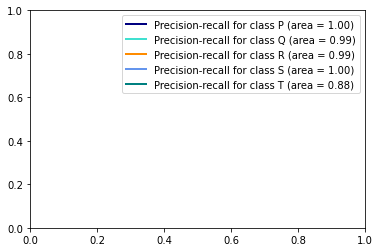

In [65]:
plt.legend(lines, labels)

In [32]:
roc_auc_score(y_test,predicted_result)

NameError: name 'roc_auc_score' is not defined

In [21]:
y_pred

array([[2.2898919e-06, 7.8250548e-07, 1.9207988e-05, ..., 9.9825567e-01,
        2.8423258e-04, 1.8683487e-07],
       [7.7819078e-07, 1.6753411e-07, 1.4503225e-05, ..., 9.9907780e-01,
        1.1031520e-06, 2.4950821e-09],
       [2.2044794e-07, 4.1416384e-05, 9.8404032e-01, ..., 2.4228606e-07,
        6.5421581e-08, 1.4482209e-09],
       ...,
       [1.6146754e-09, 6.6478372e-12, 2.4118503e-09, ..., 1.6101792e-05,
        4.1290474e-10, 1.7780439e-17],
       [1.2694551e-10, 1.2091658e-11, 3.6009613e-08, ..., 1.1554994e-06,
        6.4133676e-10, 2.1363062e-14],
       [5.9490865e-01, 7.4876803e-03, 3.0015427e-01, ..., 1.6613698e-02,
        2.9155346e-02, 1.1113413e-02]], dtype=float32)

In [22]:

predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)

test_labels = np.argmax(y_test, axis=1)

wrong_result = []
wrong_res=[]


for i in range(0,19):
    for n in range(0, len(test_labels)):
        if predicted_labels[n] != test_labels[n]:

            if (test_labels[n] == i):
                print("패밀리 오분류 결과")
                print("예측한 라벨 : ",predicted_labels[n])
                print("실제 라벨 : ",test_labels[n])
                print("해당 파일 번호:",n)

    print("\n\n")

            

# for i in range(0,19):
#     if (test_labels[n] == i):
#         if predicted_labels[n] != test_labels[n]:
#             print(""+n+"번째 패밀리 오분류 결과")
#             print("예측한 라벨 : ",predicted_labels[n])
#             print("실제 라벨 : ",test_labels[n])
#         if (test_labels[n] == 1):
#             print("실제라벨이 1 이고, 잘못 예측한 결과 값들 :", )
#         wrong_result.append(n)
#         wrong_res.append(test_labels[n])
        
# len(wrong_res)



# for wrong in wrong_res:
#     plt.imshow(X_test[])
# samples = random.choices(population=wrong_result, k=100)

# samples = wrong_result
# print(wrong_res)
# count = 0
# nrows = 2
# ncols = 4
                   
# plt.figure(figsize=(12,9))

# for n in samples:
#     count += 1
#     plt.subplot(nrows, ncols, count)
#     plt.imshow(X_test[n].reshape(128, 128), cmap='Greys', interpolation='nearest')
#     tmp = "Label:" + str(test_labels[n]) + ", Prediction:" + str(predicted_labels[n])
#     plt.title(tmp)

# plt.tight_layout()
# plt.show()


패밀리 오분류 결과
예측한 라벨 :  2
실제 라벨 :  0
해당 파일 번호: 109
패밀리 오분류 결과
예측한 라벨 :  2
실제 라벨 :  0
해당 파일 번호: 153
패밀리 오분류 결과
예측한 라벨 :  2
실제 라벨 :  0
해당 파일 번호: 300
패밀리 오분류 결과
예측한 라벨 :  7
실제 라벨 :  0
해당 파일 번호: 348
패밀리 오분류 결과
예측한 라벨 :  7
실제 라벨 :  0
해당 파일 번호: 395
패밀리 오분류 결과
예측한 라벨 :  2
실제 라벨 :  0
해당 파일 번호: 490
패밀리 오분류 결과
예측한 라벨 :  4
실제 라벨 :  0
해당 파일 번호: 587
패밀리 오분류 결과
예측한 라벨 :  2
실제 라벨 :  0
해당 파일 번호: 594
패밀리 오분류 결과
예측한 라벨 :  11
실제 라벨 :  0
해당 파일 번호: 706



패밀리 오분류 결과
예측한 라벨 :  0
실제 라벨 :  1
해당 파일 번호: 207
패밀리 오분류 결과
예측한 라벨 :  2
실제 라벨 :  1
해당 파일 번호: 286
패밀리 오분류 결과
예측한 라벨 :  2
실제 라벨 :  1
해당 파일 번호: 578
패밀리 오분류 결과
예측한 라벨 :  2
실제 라벨 :  1
해당 파일 번호: 585



패밀리 오분류 결과
예측한 라벨 :  7
실제 라벨 :  2
해당 파일 번호: 272
패밀리 오분류 결과
예측한 라벨 :  0
실제 라벨 :  2
해당 파일 번호: 419
패밀리 오분류 결과
예측한 라벨 :  11
실제 라벨 :  2
해당 파일 번호: 482
패밀리 오분류 결과
예측한 라벨 :  0
실제 라벨 :  2
해당 파일 번호: 673
패밀리 오분류 결과
예측한 라벨 :  4
실제 라벨 :  2
해당 파일 번호: 701



패밀리 오분류 결과
예측한 라벨 :  7
실제 라벨 :  3
해당 파일 번호: 645



패밀리 오분류 결과
예측한 라벨 :  11
실제 라벨 :  4
해당 파일 번호: 213
패밀리 오분류 결과
예측한 라벨 :  11
실

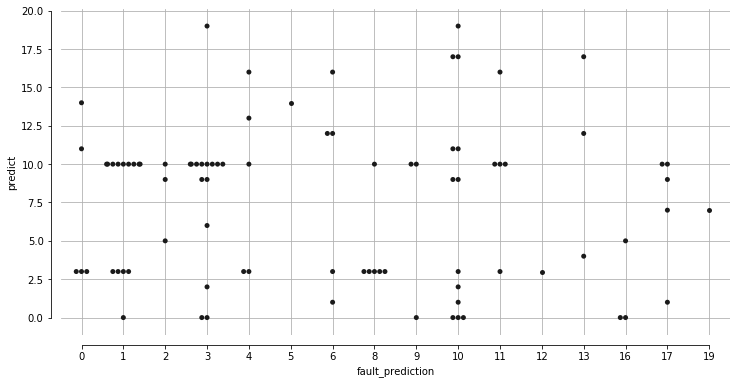

In [76]:
index = []
ori = []
pred = []
import pandas as pd

predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)

test_labels = np.argmax(y_test, axis=1)

for i in range(0,len(test_labels)):
    if test_labels[i] != predicted_labels[i]:
        index.append(i)
        ori.append(test_labels[i])
        pred.append(predicted_labels[i])
        
fail_result = pd.DataFrame({'label':ori, 'predict':pred}, index=index)




import seaborn as sns
plt.figure(figsize=(12,6))
sns.swarmplot(x="label", y="predict", data=fail_result,color='.1' )
sns.despine(offset=10, trim=True)
plt.xlabel('fault_prediction')
plt.grid()
plt.show()

TypeError: 'History' object is not subscriptable

In [180]:
# import random

# predicted_result = model.predict(x_test)
# predicted_labels = np.argmax(predicted_result, axis=1)

# test_labels = np.argmax(y_test, axis=1)

# wrong_result = []

# for n in range(0, len(test_labels)):
#     if predicted_labels[n] != test_labels[n]:
#         wrong_result.append(n)

# samples = random.choices(population=wrong_result, k=16)

# count = 0
# nrows = ncols = 4

# plt.figure(figsize=(12,8))

# for n in samples:
#     count += 1
#     plt.subplot(nrows, ncols, count)
#     plt.imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
#     tmp = "Label:" + str(test_labels[n]) + ", Prediction:" + str(predicted_labels[n])
#     plt.title(tmp)

# plt.tight_layout()
# plt.show()

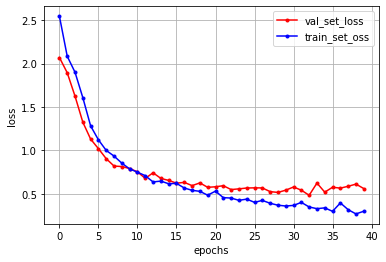

In [69]:

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_oss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

In [33]:
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(20):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(),y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

IndexError: index 14 is out of bounds for axis 1 with size 14

In [34]:
import matplotlib.colors as mcolors
import random

In [35]:
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)


In [36]:
random_colors=random.sample(list(colors),20)

In [38]:
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(20)]))
lw =2
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(20):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 20

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(12,10))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)


for i, color in zip(range(20), random_colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

KeyError: 14

In [ ]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(X, Y)
StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
for train_index, test_index in skf.split(X, Y):
    print("TRAIN:", train_index, "TEST:", test_index)
    print(Y[test_index])
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]